<a href="https://colab.research.google.com/github/felista47/Felista-Manoti/blob/main/Classification_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h2>Classification algorithms</h2>**

As we said earlier supervised machine learning is divided into regression and classification. In classification the outcome variable is categorical while in regression, the outcome variable is numerical.
In this section we are going to look at an example of a classification algorithm called Logistic regression.

**<h3>Logistic regression</h3>**

Logistic regression is a commonly used machine learning technique for modeling binary outcomes. It’s particularly useful when the dependent variable (target) is categorical. Logistic regression is used for binary classification tasks. Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability that a given observation belongs to a particular category or class. For example, if we want to know the probaility of someone dying from cholera based on the age, the source of drinking water, the kind of toilet they use and the area they come from either formal settlemt or not. In this case the outcome variable is either they are likely to live or they are likely to die.

We are going to demonstrate how logistic regression works using the data collected about cholera outbreak in Lamu county. As we did earlier we are going to import our libraries, load our data, create our model, train our model and test our model.

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

We are going to load the data using the pandas library read_excel() function because our data is in excel file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the data
data_cholera=pd.read_excel("/content/drive/My Drive/ENGAGE/ENGAGE/Datasets/Classification_Algorithm/cholera_outbreak_in_lamu.xlsx")
#displaying the first five rows
data_cholera.head(10)

,Test_result,Test_date,Sex,Age,Subcounty,Water,Sanitation,Income,Informal_settlement,Outcome
0,0,2023-05-12,2,15,4,1,3,3,2,0
1,1,2023-05-13,2,6,2,3,3,1,1,0
2,0,2023-05-14,2,9,3,2,2,5,2,0
3,0,2023-05-15,2,10,1,4,4,5,2,0
4,0,2023-05-16,1,10,2,2,4,1,1,0
5,0,2023-05-17,2,16,6,2,2,4,2,0
6,0,2023-05-18,2,19,1,1,1,2,2,0
7,0,2023-05-12,2,19,4,2,4,2,2,0
8,0,2023-05-13,1,45,4,4,4,1,2,0
9,0,2023-05-13,1,22,2,4,4,5,2,0


Our data has 10 columns. We will use the Test_result, sex, age, subcounty, water, sanitation, income and whether they live in a formal or informal setlement as our indepedent variables and the Outcome column as our depedent variable.

In [ ]:
data_cholera.shape

(312, 10)

In [ ]:
data_cholera.columns

Index(['Test_result', 'Test_date', 'Sex', 'Age', 'Subcounty', 'Water',
       'Sanitation', 'Income', 'Informal_settlement', 'Outcome'],
      dtype='object')

In [ ]:
data_cholera.isnull().sum()

,0
Test_result,0
Test_date,0
Sex,0
Age,0
Subcounty,0
Water,0
Sanitation,0
Income,0
Informal_settlement,0
Outcome,0


In [ ]:
#Seperating the x and the y variables and converting them to numpy array
X=data_cholera.drop(columns=["Outcome","Test_date"])
y=data_cholera['Outcome']
X=X.to_numpy()
y=y.to_numpy()

After creating our x and y values, we will now split the data into training and testing data

In [14]:
# Calculate Class Frequencies
class_counts = pd.Series(y).value_counts()
print(class_counts)

0    296
1     16
Name: count, dtype: int64


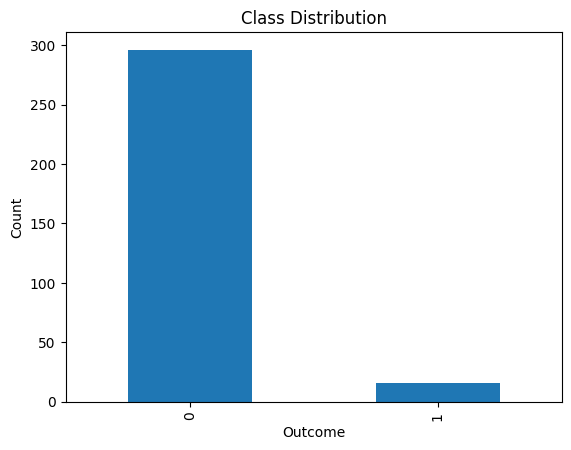

In [15]:
import matplotlib.pyplot as plt
class_counts.plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### Using SMOTR

In [ ]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

After splitting our data, we can now create our model

In [ ]:
model=LogisticRegression()

In [ ]:
#Training the model
model.fit(X_train, y_train)

LogisticRegression()

**<h2>Classification Model evaluation</h2>**

**Accuracy:** Accuracy measures the ratio of correctly predicted observations to total observations. Accuracy is useful mainly in balanced classes.

**Precision:** Precision measurers the ratio of the true positive(No of values that were positively predicted as positive that were actually positive) and total number all the values that were predicted as positive. True Positive/(True Positive+False Positive)

**Recall:** Measurers the propotion of the actual positives that were predicted correctly. True Positive/(True positive+False negative)

**F1 score:**
F1 Score is a metric used to evaluate a classification model. It is mostly used in binary classification where the output variable is either yes or no, or 1 and 0. It is the harmonic mean of precision and recall, providing a single metric that balances both the false positives and false negatives. As you recall from the previous class the harmonic mean is a type of average, typically used to calculate the mean of rates or ratios. It is especially useful in situations where the average of rates is desired.

Now we are going to use the metrics we have discussed so that we can evaluate our logistic regression model. The classification report gives us most of the metrics for evaluating classification.




In [13]:
#Testing the model using the test data
y_pred=model.predict(X_test)
y1_pred=model.predict([[0,2,10,3,3,3,3,1]])
print(y1_pred)

[0]


In [16]:
# predicting model biasness
average_prediction = y_pred.mean()
average_actual = y_test.mean()
print("Average Prediction:", average_prediction)
print("Average Actual:", average_actual)

Average Prediction: 0.0
Average Actual: 0.06382978723404255


In [17]:
#

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",conf_matrix)
print("Class report:", class_report)
from sklearn.metrics import roc_auc_score
# Calculate AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for positive class
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

Accuracy: 0.9361702127659575
Confusion matrix: [[88  0]
 [ 6  0]]
Class report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       0.00      0.00      0.00         6

    accuracy                           0.94        94
   macro avg       0.47      0.50      0.48        94
weighted avg       0.88      0.94      0.91        94

AUC: 0.6401515151515151


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**<h2>Model Evaluation Interpretation</h2>**

From the classification report  we can see that precision is 1 meaning that our model indetified all the positive values as positive. This means that all the people who died from cholera were indetified to have died. Recall is indicated as 0.97 meaning that out of all the  values that were predicted to be dead 0.03 of the records were predicted to be dead when they are alive.

Our model has an accuracy of 94% meaning that it predicts correctly the outcome variable 94% of the time and the other 6% of the time it gets it wrong.

<h3>References</h3>

https://scikit-learn.org/stable/supervised_learning.html

<h2> Task </h2>

Use the data provided to create and evaluate a supervised machine learning.